In [309]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
plt.style.use('ggplot')
import re

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
#Natural laguage tool kit

import nltk 
nltk.download('stopwords')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer


# Using the stopwords.
from nltk.corpus import stopwords

# Initialize the stopwords
stoplist = stopwords.words('english')

#TD _DF
from sklearn.feature_extraction.text import TfidfVectorizer

# VADER
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

#Sentiword
from nltk.corpus import sentiwordnet as swn
nltk.download("sentiwordnet")

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

#Split data
from sklearn.model_selection import train_test_split

#Machine learning
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import svm

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/admin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_dat

## Data retrieval

In [310]:
import json
import gzip

path = 'reviews_Beauty_5.json.gz'

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF(path)

In [311]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your money,1391040000,"01 30, 2014"
1,A60XNB876KYML,7806397051,Jessica H.,"[1, 1]",This palette was a decent price and I was look...,3.0,OK Palette!,1397779200,"04 18, 2014"
2,A3G6XNM240RMWA,7806397051,Karen,"[0, 1]",The texture of this concealer pallet is fantas...,4.0,great quality,1378425600,"09 6, 2013"
3,A1PQFP6SAJ6D80,7806397051,Norah,"[2, 2]",I really can't tell what exactly this thing is...,2.0,Do not work on my face,1386460800,"12 8, 2013"
4,A38FVHZTNQ271F,7806397051,Nova Amor,"[0, 0]","It was a little smaller than I expected, but t...",3.0,It's okay.,1382140800,"10 19, 2013"


5.0    114531
4.0     39741
3.0     22248
2.0     11456
1.0     10526
Name: overall, dtype: int64


Text(0.5, 0, 'Review star')

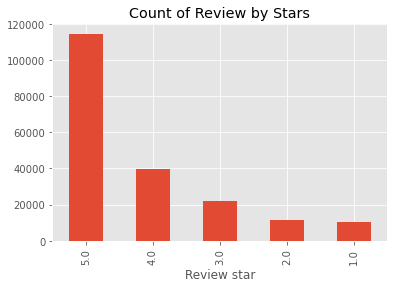

In [312]:
print(df['overall'].value_counts())
ax = df['overall'].value_counts() \
        .plot(kind = 'bar',
              title = 'Count of Review by Stars')
ax.set_xlabel("Review star")

In [313]:
df = df[['reviewerName', 'reviewText', 'overall']]
df.head()

,reviewerName,reviewText,overall
0,Andrea,Very oily and creamy. Not at all what I expect...,1.0
1,Jessica H.,This palette was a decent price and I was look...,3.0
2,Karen,The texture of this concealer pallet is fantas...,4.0
3,Norah,I really can't tell what exactly this thing is...,2.0
4,Nova Amor,"It was a little smaller than I expected, but t...",3.0


In [314]:
df = df.rename(columns = {'overall': 'starReview'})
df.head()

,reviewerName,reviewText,starReview
0,Andrea,Very oily and creamy. Not at all what I expect...,1.0
1,Jessica H.,This palette was a decent price and I was look...,3.0
2,Karen,The texture of this concealer pallet is fantas...,4.0
3,Norah,I really can't tell what exactly this thing is...,2.0
4,Nova Amor,"It was a little smaller than I expected, but t...",3.0


In [315]:
#Delete rows to make dataset balance
df5 = df[df['starReview'] == 5.0]


remove_n = 104531
drop_indices = np.random.choice(df5.index, remove_n, replace=False)
df5 = df5.drop(drop_indices)


In [316]:
df5.shape

(10000, 3)

In [317]:
#Delete rows to make dataset balance
df4 = df[df['starReview'] == 4.0]

remove_n = 29741
drop_indices = np.random.choice(df4.index, remove_n, replace=False)
df4 = df4.drop(drop_indices)

In [318]:
df4.shape

(10000, 3)

In [319]:
#Delete rows to make dataset balance
df3 = df[df['starReview'] == 3.0]

remove_n = 12248
drop_indices = np.random.choice(df3.index, remove_n, replace=False)
df3 = df3.drop(drop_indices)

In [320]:
df3.shape

(10000, 3)

In [321]:
#Delete rows to make dataset balance
df2 = df[df['starReview'] == 2.0]

remove_n = 1456
drop_indices = np.random.choice(df2.index, remove_n, replace=False)
df2 = df2.drop(drop_indices)

In [322]:
#Delete rows to make dataset balance
df1 = df[df['starReview'] == 1.0]

remove_n = 526
drop_indices = np.random.choice(df1.index, remove_n, replace=False)
df1 = df1.drop(drop_indices)


In [323]:
frames = [df1, df2, df3, df4, df5]

df = pd.concat(frames).reset_index(drop=True)
#df = df.reindex(index = [i for i in range(df.shape[0])])

In [324]:
df

,reviewerName,reviewText,starReview
0,Andrea,Very oily and creamy. Not at all what I expect...,1.0
1,"tasha ""luvely12b""",PLEASE DONT DO IT! this just rachett the palet...,1.0
2,Culture C Simmons,Did nothing for my skin. Used as suggested and...,1.0
3,Layla B,This gell did nothing at all. I religiously pu...,1.0
4,"Chi Le ""CL""",Please avoid this product. The conditional is ...,1.0
...,...,...,...
49995,"Ann Ingersoll Madison Rain ""Ann""",Awesome product! Love this and that it makes m...,5.0
49996,CanHave,I got this to aid in my wife's use of some Vit...,5.0
49997,Joyce M. Davidson,I have been taking this for about a week and I...,5.0
49998,theresa,I just started taking this product a few days ...,5.0


# EDA

In [325]:
df.shape

(50000, 3)

In [326]:
df.head(30)

,reviewerName,reviewText,starReview
0,Andrea,Very oily and creamy. Not at all what I expect...,1.0
1,"tasha ""luvely12b""",PLEASE DONT DO IT! this just rachett the palet...,1.0
2,Culture C Simmons,Did nothing for my skin. Used as suggested and...,1.0
3,Layla B,This gell did nothing at all. I religiously pu...,1.0
4,"Chi Le ""CL""",Please avoid this product. The conditional is ...,1.0
5,"Debra Carr ""Peace and Good Health""",I have thin fine hair and I am always searchin...,1.0
6,Fati1981,Rather than leaving my hair softer and more ma...,1.0
7,"Jeep Girl ""Crafter""","I was using these in my shower, but got tired ...",1.0
8,Barb Mechalke,I like the size of the barrel on this iron and...,1.0
9,Lynz,I absolutely love this conair instant heat cur...,1.0


3.0    10000
5.0    10000
4.0    10000
2.0    10000
1.0    10000
Name: starReview, dtype: int64


Text(0.5, 0, 'Review star')

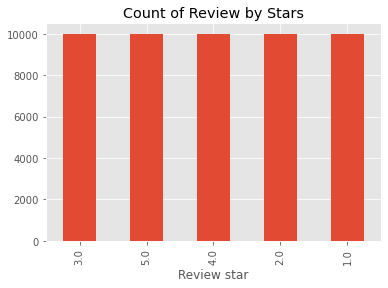

In [327]:
print(df['starReview'].value_counts())
ax = df['starReview'].value_counts() \
        .plot(kind = 'bar',
              title = 'Count of Review by Stars')
ax.set_xlabel("Review star")

## Pre-Processing 

### 3.1 Cleaning the text 

In [328]:
#Define a function to clean the text
def clean(text):
    #Remove all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    #lower case conversion
    text = text.lower()
    return text

#Cleaning the text in the review column
df['cleanedReview'] = df['reviewText'].apply(clean)
df.head()

,reviewerName,reviewText,starReview,cleanedReview
0,Andrea,Very oily and creamy. Not at all what I expect...,1.0,very oily and creamy not at all what i expecte...
1,"tasha ""luvely12b""",PLEASE DONT DO IT! this just rachett the palet...,1.0,please dont do it this just rachett the palett...
2,Culture C Simmons,Did nothing for my skin. Used as suggested and...,1.0,did nothing for my skin used as suggested and ...
3,Layla B,This gell did nothing at all. I religiously pu...,1.0,this gell did nothing at all i religiously put...
4,"Chi Le ""CL""",Please avoid this product. The conditional is ...,1.0,please avoid this product the conditional is s...


### 3.2 Tokenization

In [329]:
#Define a function to tokenize the text
def tokenizeText(text):
    token = nltk.word_tokenize(text)
    return token

#Apply tokenize funtion into the cleaned text
df['tokenReview'] = df['cleanedReview'].apply(tokenizeText)
df.head()

,reviewerName,reviewText,starReview,cleanedReview,tokenReview
0,Andrea,Very oily and creamy. Not at all what I expect...,1.0,very oily and creamy not at all what i expecte...,"[very, oily, and, creamy, not, at, all, what, ..."
1,"tasha ""luvely12b""",PLEASE DONT DO IT! this just rachett the palet...,1.0,please dont do it this just rachett the palett...,"[please, dont, do, it, this, just, rachett, th..."
2,Culture C Simmons,Did nothing for my skin. Used as suggested and...,1.0,did nothing for my skin used as suggested and ...,"[did, nothing, for, my, skin, used, as, sugges..."
3,Layla B,This gell did nothing at all. I religiously pu...,1.0,this gell did nothing at all i religiously put...,"[this, gell, did, nothing, at, all, i, religio..."
4,"Chi Le ""CL""",Please avoid this product. The conditional is ...,1.0,please avoid this product the conditional is s...,"[please, avoid, this, product, the, conditiona..."


### 3.3 Stopwords Removal

In [330]:
#define a funtion for stopwords
def stopword(text):
    new_text = (" ").join(ele for ele in text if ele.lower() not in set(stopwords.words('english')))
    return new_text
#Apply
df['stopwordRemoved'] = df['tokenReview'].apply(stopword)
df.head()

,reviewerName,reviewText,starReview,cleanedReview,tokenReview,stopwordRemoved
0,Andrea,Very oily and creamy. Not at all what I expect...,1.0,very oily and creamy not at all what i expecte...,"[very, oily, and, creamy, not, at, all, what, ...",oily creamy expected ordered try highlight con...
1,"tasha ""luvely12b""",PLEASE DONT DO IT! this just rachett the palet...,1.0,please dont do it this just rachett the palett...,"[please, dont, do, it, this, just, rachett, th...",please dont rachett palette size like picture ...
2,Culture C Simmons,Did nothing for my skin. Used as suggested and...,1.0,did nothing for my skin used as suggested and ...,"[did, nothing, for, my, skin, used, as, sugges...",nothing skin used suggested signs brightness w...
3,Layla B,This gell did nothing at all. I religiously pu...,1.0,this gell did nothing at all i religiously put...,"[this, gell, did, nothing, at, all, i, religio...",gell nothing religiously put specific areas we...
4,"Chi Le ""CL""",Please avoid this product. The conditional is ...,1.0,please avoid this product the conditional is s...,"[please, avoid, this, product, the, conditiona...",please avoid product conditional thick flow wa...


In [331]:
df[["tokenReview", "stopwordRemoved"]].head()

,tokenReview,stopwordRemoved
0,"[very, oily, and, creamy, not, at, all, what, ...",oily creamy expected ordered try highlight con...
1,"[please, dont, do, it, this, just, rachett, th...",please dont rachett palette size like picture ...
2,"[did, nothing, for, my, skin, used, as, sugges...",nothing skin used suggested signs brightness w...
3,"[this, gell, did, nothing, at, all, i, religio...",gell nothing religiously put specific areas we...
4,"[please, avoid, this, product, the, conditiona...",please avoid product conditional thick flow wa...


### 3.4 POS tagging

In [332]:
#Define a function to POS the text
def POS(text):
    tags = nltk.pos_tag(nltk.word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, tag]))
    return newlist


#Apply POS funtion into the token text
df['posReview'] = df['stopwordRemoved'].apply(POS)

df[["cleanedReview","tokenReview", "stopwordRemoved","posReview"]].head()

,cleanedReview,tokenReview,stopwordRemoved,posReview
0,very oily and creamy not at all what i expecte...,"[very, oily, and, creamy, not, at, all, what, ...",oily creamy expected ordered try highlight con...,"[(oily, RB), (creamy, JJ), (expected, VBN), (o..."
1,please dont do it this just rachett the palett...,"[please, dont, do, it, this, just, rachett, th...",please dont rachett palette size like picture ...,"[(please, VB), (dont, JJ), (rachett, NN), (pal..."
2,did nothing for my skin used as suggested and ...,"[did, nothing, for, my, skin, used, as, sugges...",nothing skin used suggested signs brightness w...,"[(nothing, NN), (skin, NN), (used, VBN), (sugg..."
3,this gell did nothing at all i religiously put...,"[this, gell, did, nothing, at, all, i, religio...",gell nothing religiously put specific areas we...,"[(gell, NN), (nothing, NN), (religiously, RB),..."
4,please avoid this product the conditional is s...,"[please, avoid, this, product, the, conditiona...",please avoid product conditional thick flow wa...,"[(please, VB), (avoid, JJ), (product, NN), (co..."


### Normalization

In [333]:
wordnet_lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN


def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        #lemmaw = ps.stem(word)
        lemma = wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(pos))
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew


df['Lemma'] = df['posReview'].apply(lemmatize)

df[["cleanedReview","tokenReview", "stopwordRemoved","posReview","Lemma"]].head()

,cleanedReview,tokenReview,stopwordRemoved,posReview,Lemma
0,very oily and creamy not at all what i expecte...,"[very, oily, and, creamy, not, at, all, what, ...",oily creamy expected ordered try highlight con...,"[(oily, RB), (creamy, JJ), (expected, VBN), (o...",oily creamy expect ordered try highlight con...
1,please dont do it this just rachett the palett...,"[please, dont, do, it, this, just, rachett, th...",please dont rachett palette size like picture ...,"[(please, VB), (dont, JJ), (rachett, NN), (pal...",please dont rachett palette size like pictur...
2,did nothing for my skin used as suggested and ...,"[did, nothing, for, my, skin, used, as, sugges...",nothing skin used suggested signs brightness w...,"[(nothing, NN), (skin, NN), (used, VBN), (sugg...",nothing skin use suggest sign brightness wis...
3,this gell did nothing at all i religiously put...,"[this, gell, did, nothing, at, all, i, religio...",gell nothing religiously put specific areas we...,"[(gell, NN), (nothing, NN), (religiously, RB),...",gell nothing religiously put specific area w...
4,please avoid this product the conditional is s...,"[please, avoid, this, product, the, conditiona...",please avoid product conditional thick flow wa...,"[(please, VB), (avoid, JJ), (product, NN), (co...",please avoid product conditional thick flow ...


In [334]:

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns
#("a", "the", ...) to reduce the number of noisy features
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 3), stop_words='english')
X_train_vc = vectorizer.fit_transform(df["Lemma"])

pd.DataFrame(X_train_vc.toarray(), columns=vectorizer.get_feature_names())

,aa,aa battery,aa hair,aaa,aacute,abandon,ability,able,able apply,able brush,...,zo mean,zo mean particle,zo non,zo non nano,zombie,zone,zone area,zone oily,zoom,zoya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [335]:
df = df.reset_index()

## 1.) Sentiment analysis using SegnetWord

In [390]:
pos=neg=obj=count=0

postagging = []

for review in df['stopwordRemoved']:
    list = word_tokenize(review)
    postagging.append(nltk.pos_tag(list))

df['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []
#Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0

senti_score = []

for pos_val in df['posReview']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
df['senti_score'] = senti_score
print(df['senti_score'])



0       -0.875
1        0.500
2        0.000
3        0.125
4        0.500
         ...  
49995    1.375
49996    0.250
49997    2.000
49998    3.875
49999   -0.625
Name: senti_score, Length: 50000, dtype: float64


In [396]:
df.head(30)

,index,reviewerName,reviewText,starReview,cleanedReview,tokenReview,stopwordRemoved,posReview,Lemma,sentiment,label,pos_tags,senti_score,swn_analyse
0,0,Andrea,Very oily and creamy. Not at all what I expect...,1.0,very oily and creamy not at all what i expecte...,"[very, oily, and, creamy, not, at, all, what, ...",oily creamy expected ordered try highlight con...,"[(oily, RB), (creamy, JJ), (expected, VBN), (o...",oily creamy expect ordered try highlight con...,Negative,-1,"[(oily, RB), (creamy, JJ), (expected, VBN), (o...",-0.875,Negative
1,1,"tasha ""luvely12b""",PLEASE DONT DO IT! this just rachett the palet...,1.0,please dont do it this just rachett the palett...,"[please, dont, do, it, this, just, rachett, th...",please dont rachett palette size like picture ...,"[(please, VB), (dont, JJ), (rachett, NN), (pal...",please dont rachett palette size like pictur...,Negative,-1,"[(please, VB), (dont, JJ), (rachett, NN), (pal...",0.500,Positive
2,2,Culture C Simmons,Did nothing for my skin. Used as suggested and...,1.0,did nothing for my skin used as suggested and ...,"[did, nothing, for, my, skin, used, as, sugges...",nothing skin used suggested signs brightness w...,"[(nothing, NN), (skin, NN), (used, VBN), (sugg...",nothing skin use suggest sign brightness wis...,Negative,-1,"[(nothing, NN), (skin, NN), (used, VBN), (sugg...",0.000,Neutral
3,3,Layla B,This gell did nothing at all. I religiously pu...,1.0,this gell did nothing at all i religiously put...,"[this, gell, did, nothing, at, all, i, religio...",gell nothing religiously put specific areas we...,"[(gell, NN), (nothing, NN), (religiously, RB),...",gell nothing religiously put specific area w...,Negative,-1,"[(gell, NN), (nothing, NN), (religiously, RB),...",0.125,Positive
4,4,"Chi Le ""CL""",Please avoid this product. The conditional is ...,1.0,please avoid this product the conditional is s...,"[please, avoid, this, product, the, conditiona...",please avoid product conditional thick flow wa...,"[(please, VB), (avoid, JJ), (product, NN), (co...",please avoid product conditional thick flow ...,Negative,-1,"[(please, VB), (avoid, JJ), (product, NN), (co...",0.500,Positive
5,5,"Debra Carr ""Peace and Good Health""",I have thin fine hair and I am always searchin...,1.0,i have thin fine hair and i am always searchin...,"[i, have, thin, fine, hair, and, i, am, always...",thin fine hair always searching miracle beauti...,"[(thin, JJ), (fine, JJ), (hair, NN), (always, ...",thin fine hair always search miracle beautif...,Negative,-1,"[(thin, JJ), (fine, JJ), (hair, NN), (always, ...",1.125,Positive
6,6,Fati1981,Rather than leaving my hair softer and more ma...,1.0,rather than leaving my hair softer and more ma...,"[rather, than, leaving, my, hair, softer, and,...",rather leaving hair softer manageable conditio...,"[(rather, RB), (leaving, VBG), (hair, NN), (so...",rather leave hair softer manageable conditio...,Negative,-1,"[(rather, RB), (leaving, VBG), (hair, NN), (so...",1.125,Positive
7,7,"Jeep Girl ""Crafter""","I was using these in my shower, but got tired ...",1.0,i was using these in my shower but got tired o...,"[i, was, using, these, in, my, shower, but, go...",using shower got tired pumps working especiall...,"[(using, VBG), (shower, JJR), (got, VBD), (tir...",use shower get tired pump work especially co...,Negative,-1,"[(using, VBG), (shower, JJR), (got, VBD), (tir...",0.250,Positive
8,8,Barb Mechalke,I like the size of the barrel on this iron and...,1.0,i like the size of the barrel on this iron and...,"[i, like, the, size, of, the, barrel, on, this...",like size barrel iron like results got however...,"[(like, IN), (size, NN), (barrel, NN), (iron, ...",like size barrel iron like result get howeve...,Negative,-1,"[(like, IN), (size, NN), (barrel, NN), (iron, ...",-0.375,Negative
9,9,Lynz,I absolutely love this conair instant heat cur...,1.0,i absolutely love this conair instant heat cur...,"[i, absolutely, love, this, conair, instant, h...",absolutely love conair in

In [393]:
def analysis(score):
    if score < -0.05:
        return 'Negative'
    elif score > 0.05:
        return 'Positive'
    else:
        return 'Neautral'
        
df['swn_analyse'] = df['senti_score'].apply(analysis)

In [395]:
swn_counts= df['swn_analyse'].value_counts()
swn_counts

Positive    34527
Negative    13077
Neutral      2396
Name: swn_analyse, dtype: int64

## 2.) Sentiment Analysis using VADER (NLTK)

In [403]:
# Without preprocessing data

# Run the polarity score on the entire data.
res2 = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    row['reviewText'] = str(row['reviewText'])
    text = row['reviewText']
    myid = row['index']
    res2[myid] = sia.polarity_scores(text)

In [404]:
#See the result
#Store the result into Dataframe
VaderResult2 = pd.DataFrame(res2).T
VaderResult2

,neg,neu,pos,compound
0,0.124,0.799,0.077,-0.3561
1,0.080,0.801,0.119,0.4597
2,0.069,0.774,0.157,0.2617
3,0.107,0.893,0.000,-0.3372
4,0.110,0.813,0.077,-0.5277
...,...,...,...,...
49995,0.000,0.660,0.340,0.9515
49996,0.000,0.895,0.105,0.7163
49997,0.047,0.699,0.254,0.8687
49998,0.044,0.772,0.184,0.9280


In [406]:
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Vader_Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)
    
def vader_analysis(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05 :
        return 'Negative'
    else:
        return 'Neutral'

df['Vader Analysis'] = df['Vader_Sentiment'].apply(vader_analysis)
df.head()

,index,reviewerName,reviewText,starReview,cleanedReview,tokenReview,stopwordRemoved,posReview,Lemma,sentiment,label,pos_tags,senti_score,swn_analyse,Vader_Sentiment,Vader Analysis
0,0,Andrea,Very oily and creamy. Not at all what I expect...,1.0,very oily and creamy not at all what i expecte...,"[very, oily, and, creamy, not, at, all, what, ...",oily creamy expected ordered try highlight con...,"[(oily, RB), (creamy, JJ), (expected, VBN), (o...",oily creamy expect ordered try highlight con...,Negative,-1,"[(oily, RB), (creamy, JJ), (expected, VBN), (o...",-0.875,Negative,-0.1531,Negative
1,1,"tasha ""luvely12b""",PLEASE DONT DO IT! this just rachett the palet...,1.0,please dont do it this just rachett the palett...,"[please, dont, do, it, this, just, rachett, th...",please dont rachett palette size like picture ...,"[(please, VB), (dont, JJ), (rachett, NN), (pal...",please dont rachett palette size like pictur...,Negative,-1,"[(please, VB), (dont, JJ), (rachett, NN), (pal...",0.500,Positive,0.8481,Positive
2,2,Culture C Simmons,Did nothing for my skin. Used as suggested and...,1.0,did nothing for my skin used as suggested and ...,"[did, nothing, for, my, skin, used, as, sugges...",nothing skin used suggested signs brightness w...,"[(nothing, NN), (skin, NN), (used, VBN), (sugg...",nothing skin use suggest sign brightness wis...,Negative,-1,"[(nothing, NN), (skin, NN), (used, VBN), (sugg...",0.000,Neutral,0.6486,Positive
3,3,Layla B,This gell did nothing at all. I religiously pu...,1.0,this gell did nothing at all i religiously put...,"[this, gell, did, nothing, at, all, i, religio...",gell nothing religiously put specific areas we...,"[(gell, NN), (nothing, NN), (religiously, RB),...",gell nothing religiously put specific area w...,Negative,-1,"[(gell, NN), (nothing, NN), (religiously, RB),...",0.125,Positive,0.3252,Positive
4,4,"Chi Le ""CL""",Please avoid this product. The conditional is ...,1.0,please avoid this product the conditional is s...,"[please, avoid, this, product, the, conditiona...",please avoid product conditional thick flow wa...,"[(please, VB), (avoid, JJ), (product, NN), (co...",please avoid product conditional thick flow ...,Negative,-1,"[(please, VB), (avoid, JJ), (product, NN), (co...",0.500,Positive,0.2263,Positive


In [407]:
vader_counts = df['Vader Analysis'].value_counts()
vader_counts

Positive    41573
Negative     5754
Neutral      2673
Name: Vader Analysis, dtype: int64

## 3.)Sentiment Analysis using TextBlob

The two measures that are used to analyze the sentiment are:

Polarity – talks about how positive or negative the opinion is
Subjectivity – talks about how subjective the opinion is

In [398]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [399]:
TextBlob_data = pd.DataFrame(df[['reviewText', 'Lemma']])

In [400]:
TextBlob_data['Subjectivity'] = TextBlob_data['Lemma'].apply(getSubjectivity) 
TextBlob_data['Polarity'] = TextBlob_data['Lemma'].apply(getPolarity) 
TextBlob_data['Analysis'] = TextBlob_data['Polarity'].apply(analysis)
TextBlob_data.head()

,reviewText,Lemma,Subjectivity,Polarity,Analysis
0,Very oily and creamy. Not at all what I expect...,oily creamy expect ordered try highlight con...,1.0000,-1.000000,Negative
1,PLEASE DONT DO IT! this just rachett the palet...,please dont rachett palette size like pictur...,0.6750,0.350000,Positive
2,Did nothing for my skin. Used as suggested and...,nothing skin use suggest sign brightness wis...,0.0000,0.000000,Neutral
3,This gell did nothing at all. I religiously pu...,gell nothing religiously put specific area w...,0.1250,-0.066667,Negative
4,Please avoid this product. The conditional is ...,please avoid product conditional thick flow ...,0.6875,-0.016667,Negative


In [401]:
tb_counts = TextBlob_data.Analysis.value_counts()
tb_counts

Positive    39889
Negative     8829
Neutral      1282
Name: Analysis, dtype: int64

## Compare result from lexicon approach

([<matplotlib.patches.Wedge at 0x7fd4e3c4e5e0>,
 [Text(-0.6198342900492939, 0.9087383852787819, 'Positive'),
  Text(0.4765337147558538, -0.9914210098141893, 'Negative'),
  Text(1.3347307979238525, -0.20246900274747204, 'Neutral')],
 [Text(-0.33809143093597843, 0.49567548287933555, '69.1%'),
  Text(0.2599274807759202, -0.540775096262285, '26.2%'),
  Text(0.8403860579520553, -0.1274804832113713, '4.8%')])

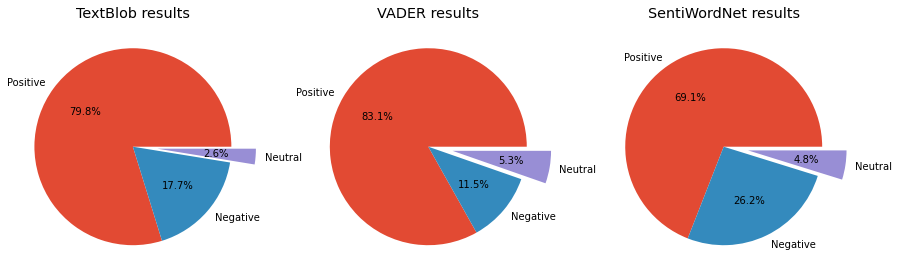

In [408]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

## K-mean 

In [263]:
#Considering 3 grams and mimnimum frq as 0
#Vectorize document using tf-idf
tf_idf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

#Fit and transfor Text data
tf_idf_vect = tf_idf.fit(df['Lemma'])
desc_matrix = tf_idf_vect.transform(df["Lemma"])

In [264]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, init = "k-means++", max_iter = 100, n_init = 1)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

In [266]:
cluster = {'review': df['Lemma'].tolist(), 'star': df['starReview'].tolist(),\
           'cluster': clusters}
clusterResult = pd.DataFrame(cluster)
clusterResult.head(30)

,review,star,cluster
0,oily creamy expect ordered try highlight con...,1.0,2
1,please dont rachett palette size like pictur...,1.0,1
2,nothing skin use suggest sign brightness wis...,1.0,2
3,gell nothing religiously put specific area w...,1.0,2
4,please avoid product conditional thick flow ...,1.0,0
5,thin fine hair always search miracle beautif...,1.0,0
6,rather leave hair softer manageable conditio...,1.0,0
7,use shower get tired pump work especially co...,1.0,0
8,second well live classic dispenser iv purcha...,1.0,2
9,like size barrel iron like result get howeve...,1.0,2


In [267]:
clusterResult['cluster'].value_counts()

2    31371
0    10063
1     8566
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='count'>

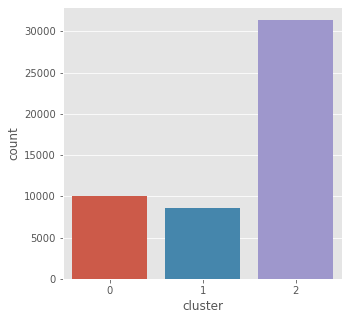

In [268]:
fig = plt.figure(figsize = (5,5))
sns.countplot(x = 'cluster', data = clusterResult)

In [269]:
# split df - positive and negative sentiment:
positive = clusterResult[clusterResult['cluster'] == 1]
negative = clusterResult[clusterResult['cluster'] == 2]
neutral = clusterResult[clusterResult['cluster'] == 0]

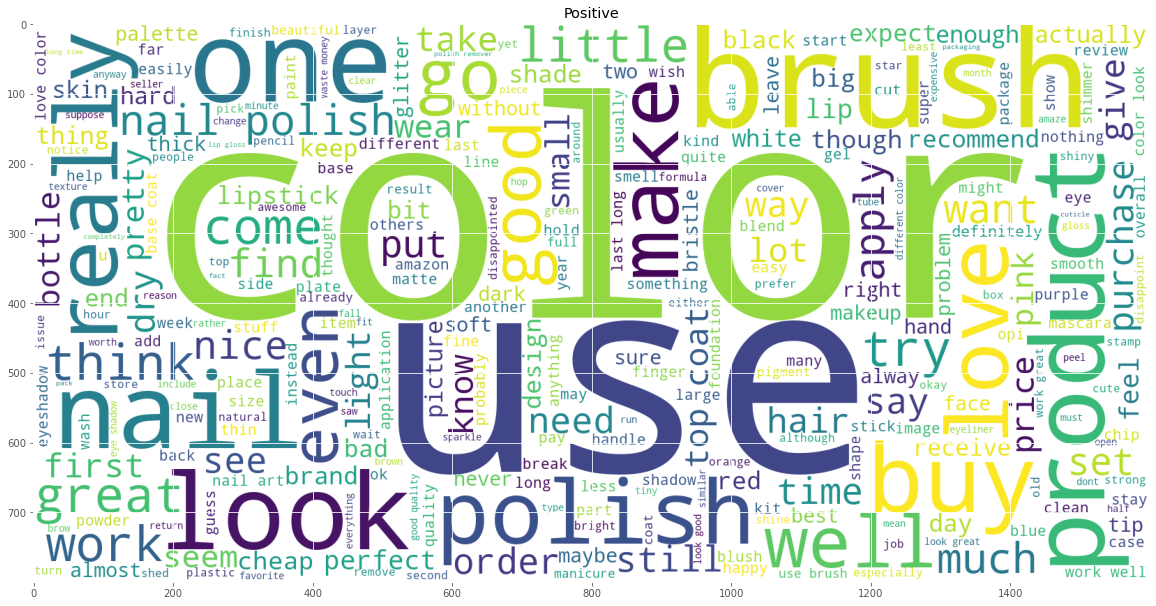

In [270]:
from wordcloud import WordCloud
text3 = ' '.join([word for word in positive['review']])
plt.figure(figsize = (20,15), facecolor = 'None')
wordcloud3 = WordCloud(max_words= 300,background_color ='white', width = 1600, height = 800).generate(text3)
plt.title("Positive")
plt.imshow(wordcloud3)

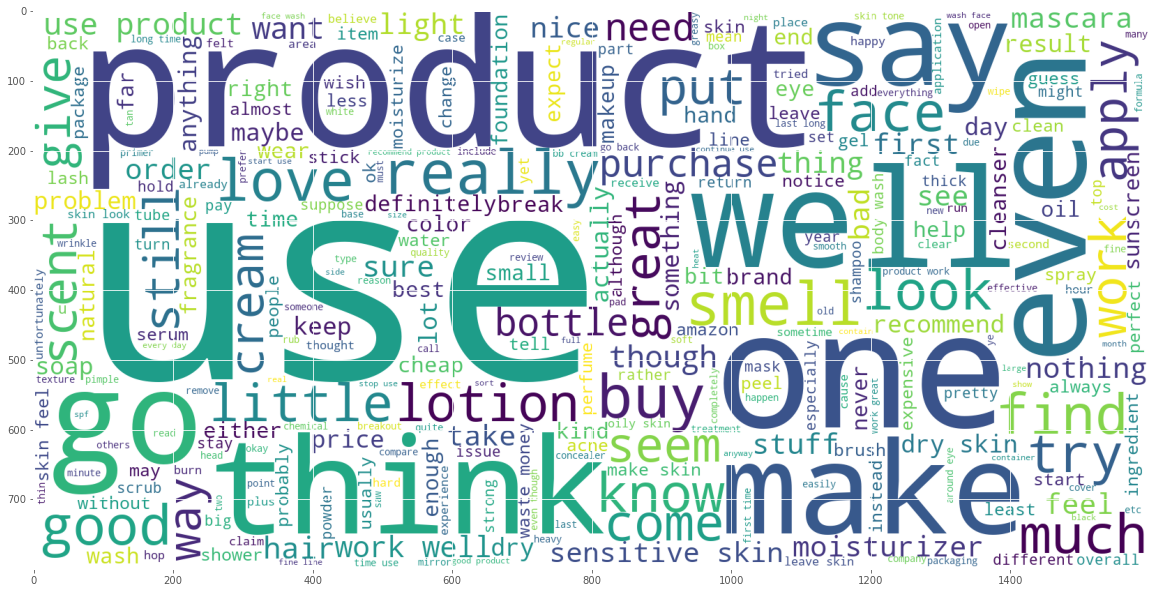

In [409]:

from wordcloud import WordCloud
text4 = ' '.join([word for word in negative['review']])
plt.figure(figsize = (20,15), facecolor = 'None')
wordcloud4 = WordCloud(max_words= 300,background_color ='white', width = 1600, height = 800).generate(text4)
plt.imshow(wordcloud4)

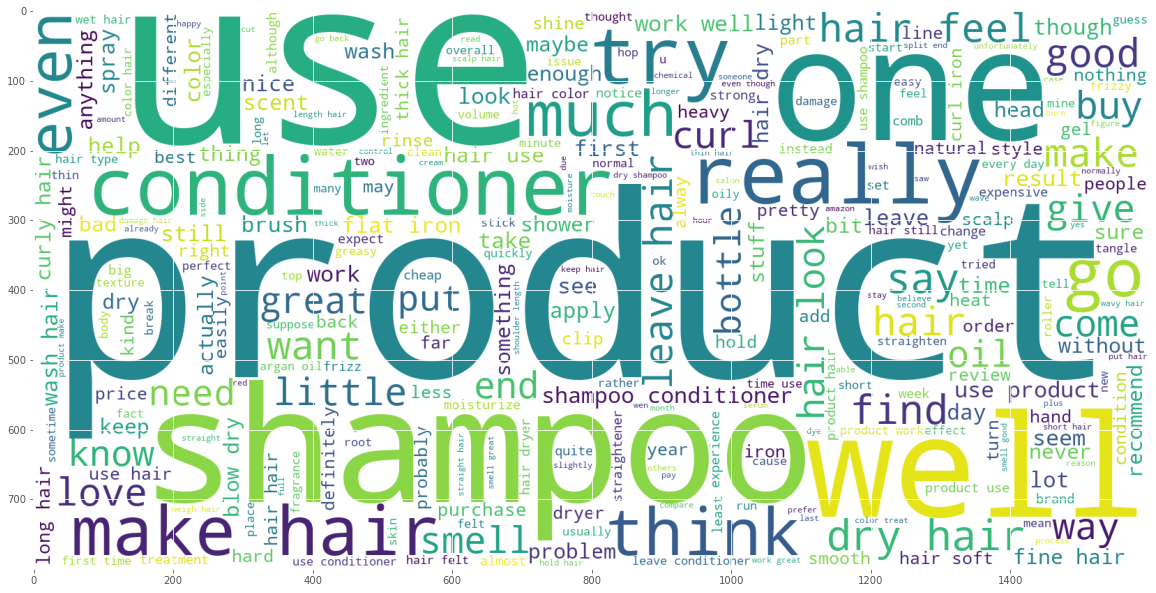

In [271]:

from wordcloud import WordCloud
text5 = ' '.join([word for word in neutral['review']])
plt.figure(figsize = (20,15), facecolor = 'None')
wordcloud5 = WordCloud(max_words= 300,background_color ='white', width = 1600, height = 800).generate(text5)
plt.imshow(wordcloud5)

In [272]:
Y = tf_idf_vect.transform(['it is really nice'])
prediction = km.predict(Y)
print(prediction)

[2]


In [273]:
Y = tf_idf_vect.transform(['This product is bad'])
prediction = km.predict(Y)
print(prediction)

[2]


## Machine Learning : Supervised learning apprach

In [336]:
def classifyByStarReview(star):
    if star <= 2:
        return 'Negative'
    elif star == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['starReview'].apply(classifyByStarReview)
df[['starReview','sentiment' ]].head()

,starReview,sentiment
0,1.0,Negative
1,1.0,Negative
2,1.0,Negative
3,1.0,Negative
4,1.0,Negative


In [337]:
def classifyByStarReview2(sentiment):
    if sentiment == 'Negative':
        return -1
    elif sentiment == 'Neutral':
        return 0
    else:
        return 1

df['label'] = df['sentiment'].apply(classifyByStarReview2)
df_ready = df[["Lemma","starReview", "sentiment", "label"]]
df_ready

,Lemma,starReview,sentiment,label
0,oily creamy expect ordered try highlight con...,1.0,Negative,-1
1,please dont rachett palette size like pictur...,1.0,Negative,-1
2,nothing skin use suggest sign brightness wis...,1.0,Negative,-1
3,gell nothing religiously put specific area w...,1.0,Negative,-1
4,please avoid product conditional thick flow ...,1.0,Negative,-1
...,...,...,...,...
49995,awesome product love make skin feel tighter ...,5.0,Positive,1
49996,get aid wife use vitamin c extract use facia...,5.0,Positive,1
49997,take week feel really good face glow look pl...,5.0,Positive,1
49998,start take product day ago since start take ...,5.0,Positive,1


<AxesSubplot:xlabel='label', ylabel='count'>

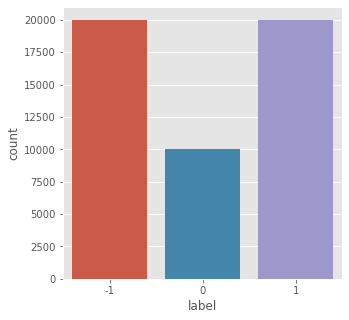

In [338]:
fig = plt.figure(figsize = (5,5))
sns.countplot(x = 'label', data = df_ready)

In [339]:
pos_review = df_ready[df_ready.label == 1]
neg_review = df_ready[df_ready.label == -1]
nue_review = df_ready[df_ready.label == 0]

In [340]:
#Vectorize features
vect = TfidfVectorizer(ngram_range=(1, 3)).fit(df_ready['Lemma'])
feature_names = vect.get_feature_names()
print("Nunber of feature: {}\n".format(len(feature_names)))
print("first 20 features: {}\n".format(feature_names[:20]))

Nunber of feature: 2598251

first 20 features: ['aa', 'aa battery', 'aa battery battery', 'aa battery buy', 'aa battery come', 'aa battery convenient', 'aa battery five', 'aa battery include', 'aa battery insert', 'aa battery know', 'aa battery last', 'aa battery light', 'aa battery new', 'aa battery plus', 'aa battery powerful', 'aa battery pretty', 'aa battery push', 'aa battery quickly', 'aa battery rejuvinating', 'aa battery salicylic']



In [358]:
X = df_ready['Lemma']
Y = df_ready['label']
X = vect.transform(X)

### Building model

In [342]:
#Train and test split (Test size = 0.2, ratio = 80 / 20)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 2598251)
(10000, 2598251)
(40000,)
(10000,)


In [363]:
#define Evaluate model
def evaluate(y_true, y_pred):
    acc = metrics.accuracy_score(y_true, y_pred)
    conf = confusion_matrix(y_true, y_pred)
    # prec = metrics.precision_score(y_true, y_pred)
    # sensitivity = metrics.recall_score(y_true, y_pred)
    return {'accuracy': acc,
            'confusion': conf
            # "precision:" , prec,
            # "sensitivity:", sensitivity
            }

#NB
kf = KFold(n_splits = 5)
results_Naive_Bayes = []

for train_index, val_index in kf.split(X_train,y_train):
    X_trData, X_valData = X_train[train_index], X_train[val_index]
    y_trData, y_valData = y_train.iloc[train_index], y_train.iloc[val_index]

    # Model Generation Using Multinomial Naive Bayes
    clf = MultinomialNB(alpha = 0.6).fit(X_trData, y_trData)

    #evaluate model
    y_true = y_valData
    y_pred = clf.predict(X_valData)
    res = evaluate(y_true, y_pred)
    results_Naive_Bayes.append(res)


In [344]:
#SVM


kf = KFold(n_splits = 5)
resultsSVM = []
for train_index, test_index in kf.split(X_train,y_train):
    X_trData, X_valData = X_train[train_index], X_train[test_index]
    y_trData, y_valData = y_train.iloc[train_index], y_train.iloc[test_index]

    # Model Generation Using Multinomial Naive Bayes
    clf2 = svm.SVC()
    clf2.fit(X_trData, y_trData)

    #evaluate model
    y_true = y_valData
    y_pred = clf.predict(X_valData)
    res = evaluate(y_true, y_pred)
    resultsSVM.append(res)


In [364]:
results_Naive_Bayes

[{'accuracy': 0.666375,
  'confusion': array([[2496,    0,  690],
         [ 671,    0,  953],
         [ 355,    0, 2835]])},
 {'accuracy': 0.680375,
  'confusion': array([[2520,    0,  606],
         [ 700,    0,  914],
         [ 337,    0, 2923]])},
 {'accuracy': 0.667625,
  'confusion': array([[2487,    0,  825],
         [ 550,    0, 1035],
         [ 249,    0, 2854]])},
 {'accuracy': 0.683125,
  'confusion': array([[2539,    0,  623],
         [ 679,    0,  860],
         [ 373,    0, 2926]])},
 {'accuracy': 0.679125,
  'confusion': array([[2547,    0,  690],
         [ 634,    0,  959],
         [ 284,    0, 2886]])}]

In [351]:
pd.DataFrame(results_Naive_Bayes)

,accuracy,confusion
0,0.666125,"[[2481, 0, 705], [655, 0, 969], [342, 0, 2848]]"
1,0.679000,"[[2500, 0, 626], [694, 0, 920], [328, 0, 2932]]"
2,0.665125,"[[2453, 0, 859], [531, 0, 1054], [235, 0, 2868]]"
3,0.682750,"[[2525, 0, 637], [673, 0, 866], [362, 0, 2937]]"
4,0.676875,"[[2510, 0, 727], [621, 0, 972], [265, 0, 2905]]"


In [346]:
resultsSVM

[{'accuracy': 0.795375,
  'confusion': array([[3172,    0,   14],
         [ 615,    4, 1005],
         [   3,    0, 3187]])},
 {'accuracy': 0.795875,
  'confusion': array([[3110,    0,   16],
         [ 633,    4,  977],
         [   7,    0, 3253]])},
 {'accuracy': 0.797375,
  'confusion': array([[3278,    0,   34],
         [ 587,    0,  998],
         [   2,    0, 3101]])},
 {'accuracy': 0.80575,
  'confusion': array([[3146,    0,   16],
         [ 582,    4,  953],
         [   3,    0, 3296]])},
 {'accuracy': 0.676875,
  'confusion': array([[2510,    0,  727],
         [ 621,    0,  972],
         [ 265,    0, 2905]])}]

In [355]:
pd.DataFrame(resultsSVM)

,accuracy,confusion
0,0.795375,"[[3172, 0, 14], [615, 4, 1005], [3, 0, 3187]]"
1,0.795875,"[[3110, 0, 16], [633, 4, 977], [7, 0, 3253]]"
2,0.797375,"[[3278, 0, 34], [587, 0, 998], [2, 0, 3101]]"
3,0.805750,"[[3146, 0, 16], [582, 4, 953], [3, 0, 3296]]"
4,0.676875,"[[2510, 0, 727], [621, 0, 972], [265, 0, 2905]]"


### Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# define parameter range
param_grid = {'C': [ 1, 10,100],
             'gamma': [1, 0.1, 0.01],
             'kernel' : ['rbf']}

grid = GridSearchCV(clf2, param_grid, refit = True, verbose =3)

#fitting the model for grid
grid.fit(X_trData,y_trData )

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.671, total=26.9min
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 26.9min remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.672, total=25.0min
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 51.9min remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.687, total=33.2min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.675, total=26.8min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.681, total=27.5min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.656, total=17.7min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.656, total=16.6min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.671, total=16.4min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.653, total=16.3min
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

In [356]:
print(grid.best_params)

AttributeError: 'GridSearchCV' object has no attribute 'best_params'

### Assese final model

In [411]:
results_Naive_Bayes_final = []


# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

#evaluate model
y_true = y_test
y_pred = clf.predict(X_test)
res = evaluate(y_true, y_pred)
results_Naive_Bayes_final.append(res)

In [419]:
results_Naive_Bayes_final

[{'accuracy': 0.6626,
  'confusion': array([[3076,    0,  901],
         [ 813,    0, 1232],
         [ 428,    0, 3550]])}]

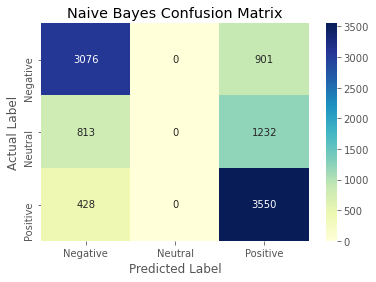

In [428]:
#visualize confusion matrix
Class_label = ["Negative", "Neutral", "Positive"]
df_con_NB_op = pd.DataFrame(results_Naive_Bayes_final[0]['confusion'], index = Class_label, columns = Class_label)

sns.heatmap(df_con_NB_op, annot = True, cmap = "YlGnBu", fmt = 'd')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [430]:
Y = vect.transform(['I love this product'])
prediction = clf.predict(Y)
print(prediction)

[1]


In [431]:
Y = vect.transform(['I hate this product'])
prediction = clf.predict(Y)
print(prediction)

[-1]


In [447]:
Y = vect.transform(['this product is fine'])
prediction = clf.predict(Y)
print(prediction)

[1]


In [433]:
results_SVM_final = []


# Model Generation Using SVM
clf2 = svm.SVC().fit(X_train, y_train)

#evaluate model
y_true = y_test
y_pred = clf2.predict(X_test)
res2 = evaluate(y_true, y_pred)
results_SVM_final.append(res2)


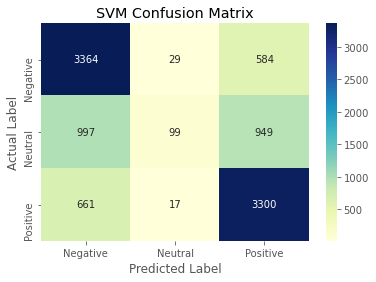

In [435]:
#visualize confusion matrix
Class_label = ["Negative", "Neutral", "Positive"]
df_con_SVM_op = pd.DataFrame(results_SVM_final[0]['confusion'], index = Class_label, columns = Class_label)

sns.heatmap(df_con_SVM_op, annot = True, cmap = "YlGnBu", fmt = 'd')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [444]:
Y2 = vect.transform(['I hate this product'])
prediction2 = clf2.predict(Y2)
print(prediction2)

[-1]


In [445]:
Y3 = vect.transform(['I love this'])
prediction3 = clf2.predict(Y3)
print(prediction3)

[1]


In [446]:
Y4 = vect.transform(['This is fine'])
prediction4 = clf2.predict(Y4)
print(prediction4)

[0]
